In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
vasaloppet = pd.read_csv("../data/vasaloppet_2022.csv")
vasaloppet.head()

,Name,Team,Age class,Place (gender),Time
0,"Nygaard, Andreas (NOR)",Team Ragde Charge,H21,1,03:32:18
1,"Öyre Slind, Astrid (NOR)",Team Koteng Eidissen,D21,1,03:50:06
2,"Persson, Emil (SWE)",Lager 157 Ski Team,H21,2,03:32:19
3,"Johansson Norgren, Britta (SWE)",Lager 157 Ski Team,D35,2,03:52:53
4,"Jutterström, Axel (SWE)",Team Eksjöhus,H21,3,03:32:20


In [3]:
#vasaloppet.Time = pd.to_timedelta(vasaloppet.Time)

In [4]:
vasaloppet[["hours", "minutes", "seconds"]] = vasaloppet.Time.str.split(":", expand=True)
vasaloppet.head()

,Name,Team,Age class,Place (gender),Time,hours,minutes,seconds
0,"Nygaard, Andreas (NOR)",Team Ragde Charge,H21,1,03:32:18,03,32,18
1,"Öyre Slind, Astrid (NOR)",Team Koteng Eidissen,D21,1,03:50:06,03,50,06
2,"Persson, Emil (SWE)",Lager 157 Ski Team,H21,2,03:32:19,03,32,19
3,"Johansson Norgren, Britta (SWE)",Lager 157 Ski Team,D35,2,03:52:53,03,52,53
4,"Jutterström, Axel (SWE)",Team Eksjöhus,H21,3,03:32:20,03,32,20


In [5]:
vasaloppet["time_hours"] = vasaloppet["hours"].astype(float) + vasaloppet["minutes"].astype(float) / 60 + vasaloppet["seconds"].astype(float) / (60*60)
vasaloppet.head()

,Name,Team,Age class,Place (gender),Time,hours,minutes,seconds,time_hours
0,"Nygaard, Andreas (NOR)",Team Ragde Charge,H21,1,03:32:18,03,32,18,3.538333
1,"Öyre Slind, Astrid (NOR)",Team Koteng Eidissen,D21,1,03:50:06,03,50,06,3.835000
2,"Persson, Emil (SWE)",Lager 157 Ski Team,H21,2,03:32:19,03,32,19,3.538611
3,"Johansson Norgren, Britta (SWE)",Lager 157 Ski Team,D35,2,03:52:53,03,52,53,3.881389
4,"Jutterström, Axel (SWE)",Team Eksjöhus,H21,3,03:32:20,03,32,20,3.538889


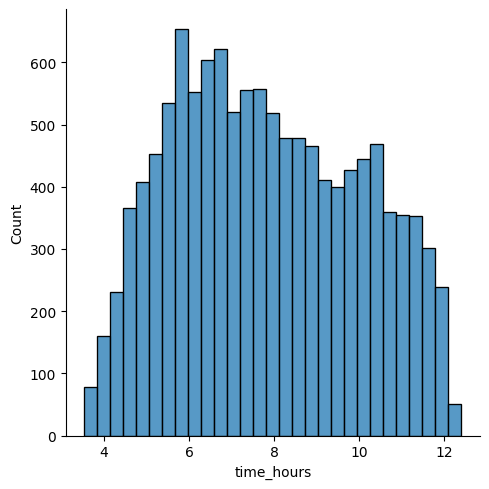

In [6]:
sns.displot(data=vasaloppet, x="time_hours")

In [7]:
vasaloppet["gender"] = vasaloppet["Age class"].str[0]
vasaloppet.tail()

,Name,Team,Age class,Place (gender),Time,hours,minutes,seconds,time_hours,gender
12039,"Redestam, Patrick (SWE)",Helsingborgs SOK,H50,10056,12:17:12,12,17,12,12.286667,H
12040,"Schennings, Andreas (SWE)",Stockholms-Postens IK,H35,10057,12:17:56,12,17,56,12.298889,H
12041,"Hed, Stefan (SWE)","<span class=""text-muted"">–</span>",H40,10058,12:21:35,12,21,35,12.359722,H
12042,"Westström, Frank (FIN)","<span class=""text-muted"">–</span>",H70,10059,12:22:26,12,22,26,12.373889,H
12043,"Bengtsson, Tommy (SWE)",IK Stern,H75,10060,12:23:38,12,23,38,12.393889,H


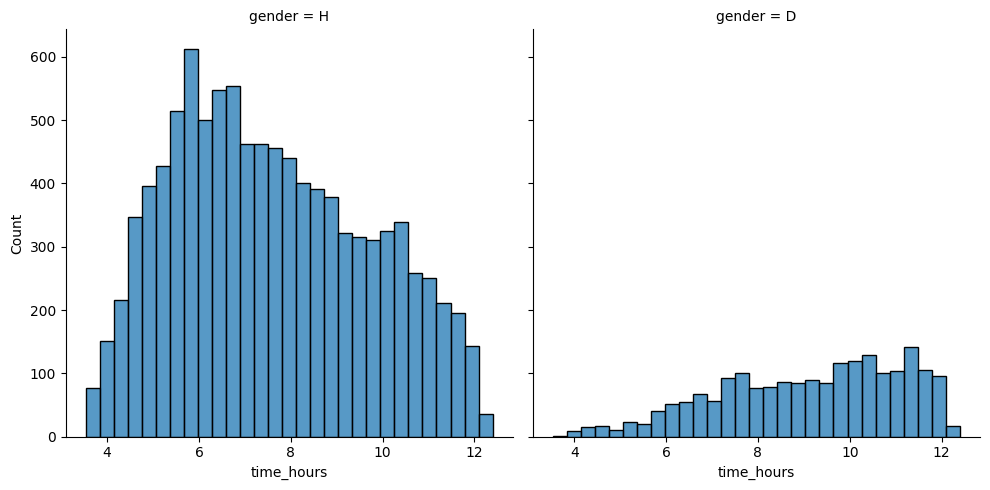

In [8]:
sns.displot(data=vasaloppet.loc[vasaloppet.gender != "<"], x="time_hours", col="gender")

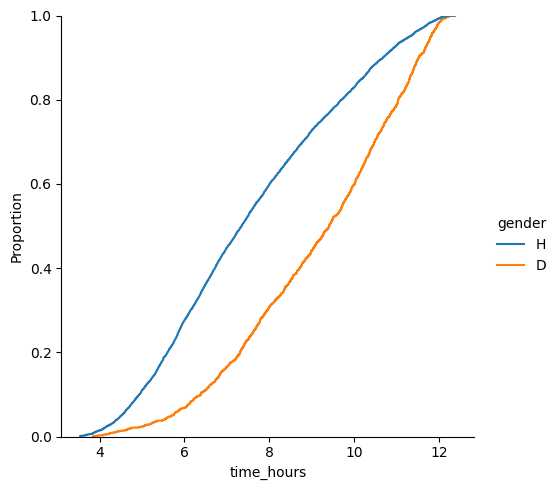

In [9]:
sns.displot(data=vasaloppet.loc[vasaloppet.gender != "<"], x="time_hours", hue="gender", kind="ecdf")

In [10]:
vasaloppet["Place (total)"] = vasaloppet["time_hours"].rank(method="first")
vasaloppet.sort_values("time_hours").tail()

,Name,Team,Age class,Place (gender),Time,hours,minutes,seconds,time_hours,gender,Place (total)
12041,"Hed, Stefan (SWE)","<span class=""text-muted"">–</span>",H40,10058,12:21:35,12,21,35,12.359722,H,12041.0
3975,"Hed, Amanda (SWE)","<span class=""text-muted"">–</span>",D21,1989,12:21:35,12,21,35,12.359722,D,12040.0
12042,"Westström, Frank (FIN)","<span class=""text-muted"">–</span>",H70,10059,12:22:26,12,22,26,12.373889,H,12042.0
3977,"Morsing, Jessica (SWE)",IK Stern,D55,1990,12:22:56,12,22,56,12.382222,D,12043.0
12043,"Bengtsson, Tommy (SWE)",IK Stern,H75,10060,12:23:38,12,23,38,12.393889,H,12044.0


# Apply seeding table for 2023

https://vasaloppet.se/wp-content/uploads/sites/1/2023/03/seedning_vl_vinterveckan_2022_2022-03-08.pdf

In [11]:
seedning = pd.DataFrame({
    "SL": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    "hours":   [ 4,  4,  4,  5,  6,  6,  7,  8, 10, 12],
    "minutes": [ 0, 30, 55, 35, 15, 56, 42, 35,  2,  1],
    "seconds": [54, 43, 53, 36, 40,  9, 33, 42, 47, 48]
}).set_index("SL")

In [12]:
seedning["time_hours"] = seedning["hours"] + seedning["minutes"] / 60 + seedning["seconds"] / (60*60)

In [13]:
seedning

,hours,minutes,seconds,time_hours
SL,,,,
0,4,0,54,4.015000
1,4,30,43,4.511944
2,4,55,53,4.931389
3,5,35,36,5.593333
4,6,15,40,6.261111
5,6,56,9,6.935833
6,7,42,33,7.709167
7,8,35,42,8.595000
8,10,2,47,10.046389


In [15]:
conditions = [
    vasaloppet["time_hours"] < seedning["time_hours"].iloc[i] 
    for i in range(10)
]

In [18]:
vasaloppet["SL2023"] = np.select(
    conditions, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], default=10)

In [19]:
vasaloppet["SL2023"].value_counts()

9     2344
8     2050
7     1443
6     1404
5     1333
4     1296
3     1044
2      516
1      372
0      155
10      87
Name: SL2023, dtype: int64